In [472]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

--2024-08-23 10:03:33--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.181, 13.224.9.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv.11’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.07s   

2024-08-23 10:03:33 (14.9 MB/s) - ‘ola_driver_scaler.csv.11’ saved [1127673/1127673]



In [473]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [474]:
import pandas as pd

df = pd.read_csv("ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [475]:
df.shape

(19104, 14)

In [476]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
None
        


Column Profiling:

MMMM-YY : Reporting Date (Monthly)

Driver_ID : Unique id for drivers

Age : Age of the driver

Gender : Gender of the driver – Male : 0, Female: 1

City : City Code of the driver

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

Income : Monthly average Income of the driver

Date Of Joining : Joining date for the driver

LastWorkingDate : Last date of working for the driver

Joining Designation : Designation of the driver at the time of joining

Grade : Grade of the driver at the time of reporting

Total Business Value : The total business value acquired by the driver in a
month (negative business indicates cancellation/refund or car EMI adjustments)

Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)



In [477]:
df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [478]:
####Droping the unnamed

df=df.drop('Unnamed: 0',axis=1)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [479]:
df.dtypes

,0
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object
Joining Designation,int64


In [480]:
df_copy=df.copy()
df_copy.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [481]:
### seperate the reporting date by month

df['reporting_month']=pd.to_datetime(df['MMM-YY']).dt.month
df['reporting_year']=pd.to_datetime(df['MMM-YY']).dt.year
df['joining_day']=pd.to_datetime(df['Dateofjoining']).dt.day
df['joining_month']=pd.to_datetime(df['Dateofjoining']).dt.month
df['joining_year']=pd.to_datetime(df['Dateofjoining']).dt.year


In [482]:
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,reporting_month,reporting_year,joining_day,joining_month,joining_year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,1,2019,24,12,2018
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,2,2019,24,12,2018
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,3,2019,24,12,2018
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,11,2020,6,11,2020
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,12,2020,6,11,2020
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,12,2019,7,12,2019
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,1,2020,7,12,2019
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,2,2020,7,12,2019
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1,3,2020,7,12,2019
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1,4,2020,7,12,2019


In [483]:
###Fill missing values in Age and Gender using KNN.

from sklearn.impute import KNNImputer


num_cols = ['Age', 'Gender', 'Education_Level', 'Income', 'Total Business Value', 'Quarterly Rating']
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

print(df.isnull().sum())

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
reporting_month             0
reporting_year              0
joining_day                 0
joining_month               0
joining_year                0
dtype: int64


In [484]:
# Target variable creation: Creating a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1
df['target'] = df['LastWorkingDate'].notnull().astype(int)

In [485]:
#Creating a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1
df['Rating_Increase'] = df.groupby('Driver_ID')['Quarterly Rating'].diff().fillna(0).gt(0).astype(int)

In [486]:
#Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1
df['Income_Increase'] = df.groupby('Driver_ID')['Income'].diff().fillna(0).gt(0).astype(int)

In [487]:
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Total Business Value,Quarterly Rating,reporting_month,reporting_year,joining_day,joining_month,joining_year,target,Rating_Increase,Income_Increase
0,01/01/19,1,28.0,0.0,C23,2.0,57387.0,24/12/18,NaN,1,...,2381060.0,2.0,1,2019,24,12,2018,0,0,0
1,02/01/19,1,28.0,0.0,C23,2.0,57387.0,24/12/18,NaN,1,...,-665480.0,2.0,2,2019,24,12,2018,0,0,0
2,03/01/19,1,28.0,0.0,C23,2.0,57387.0,24/12/18,03/11/19,1,...,0.0,2.0,3,2019,24,12,2018,1,0,0
3,11/01/20,2,31.0,0.0,C7,2.0,67016.0,11/06/20,NaN,2,...,0.0,1.0,11,2020,6,11,2020,0,0,0
4,12/01/20,2,31.0,0.0,C7,2.0,67016.0,11/06/20,NaN,2,...,0.0,1.0,12,2020,6,11,2020,0,0,0
5,12/01/19,4,43.0,0.0,C13,2.0,65603.0,12/07/19,NaN,2,...,0.0,1.0,12,2019,7,12,2019,0,0,0
6,01/01/20,4,43.0,0.0,C13,2.0,65603.0,12/07/19,NaN,2,...,0.0,1.0,1,2020,7,12,2019,0,0,0
7,02/01/20,4,43.0,0.0,C13,2.0,65603.0,12/07/19,NaN,2,...,0.0,1.0,2,2020,7,12,2019,0,0,0
8,03/01/20,4,43.0,0.0,C13,2.0,65603.0,12/07/19,NaN,2,...,350000.0,1.0,3,2020,7,12,2019,0,0,0
9,04/01/20,4,43.0,0.0,C13,2.0,65603.0,12/07/19,27/04/20,2,...,0.0,1.0,4,2020,7,12,2019,1,0,0


In [488]:
###converting to date time type

df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])

In [489]:
df.dtypes

,0
MMM-YY,datetime64[ns]
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,float64
Income,float64
Dateofjoining,datetime64[ns]
LastWorkingDate,datetime64[ns]
Joining Designation,int64


In [490]:
driver_dict = {

    'MMM-YY' : 'first',
    'Driver_ID': 'first',
    'Age' : 'first',
    'Gender' : 'first',
    'City' : 'first',
    'Education_Level' : 'first',
    'Income' : 'first',

    'Dateofjoining' : 'first',
    'LastWorkingDate' : 'last',

    'Joining Designation' : 'first',
    'Grade' : 'first',

    'Total Business Value' : 'sum',


    'Quarterly Rating' : 'last',

    'Rating_Increase' : 'last',
    'Income_Increase' : 'last',

    'target' : 'last',


    }

In [491]:
driver = df.groupby('Driver_ID').agg(driver_dict).reset_index(drop=True)
driver.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase,Income_Increase,target
0,2019-01-01,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1,1,1715580.0,2.0,0,0,1
1,2020-11-01,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2,2,0.0,1.0,0,0,0
2,2019-12-01,4,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2,2,350000.0,1.0,0,0,1
3,2019-01-01,5,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1,1,120360.0,1.0,0,0,1
4,2020-08-01,6,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3,3,1265000.0,2.0,0,0,0
5,2020-09-01,8,34.0,0.0,C2,0.0,70656.0,2020-09-19,2020-11-15,3,3,0.0,1.0,0,0,1
6,2020-12-01,11,28.0,1.0,C19,2.0,42172.0,2020-12-07,NaT,1,1,0.0,1.0,0,0,0
7,2019-07-01,12,35.0,0.0,C23,2.0,28116.0,2019-06-29,2019-12-21,1,1,2607180.0,1.0,0,0,1
8,2019-01-01,13,29.0,0.0,C19,2.0,119227.0,2015-05-28,2020-11-25,1,4,10213040.0,1.0,0,0,1
9,2020-10-01,14,39.0,1.0,C26,0.0,19734.0,2020-10-16,NaT,3,3,0.0,1.0,0,0,0


In [492]:
driver.shape

(2381, 16)

In [493]:
driver.nunique()

,0
MMM-YY,24
Driver_ID,2381
Age,42
Gender,5
City,29
Education_Level,3
Income,2339
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


In [494]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   datetime64[ns]
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   float64       
 6   Income                2381 non-null   float64       
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   float64       
 12  Quarterly Rating      2381 non-null   float64       
 13  Rating_Increase   

In [495]:
driver[driver['Driver_ID'] == 1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase,Income_Increase,target
0,2019-01-01,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1,1,1715580.0,2.0,0,0,1


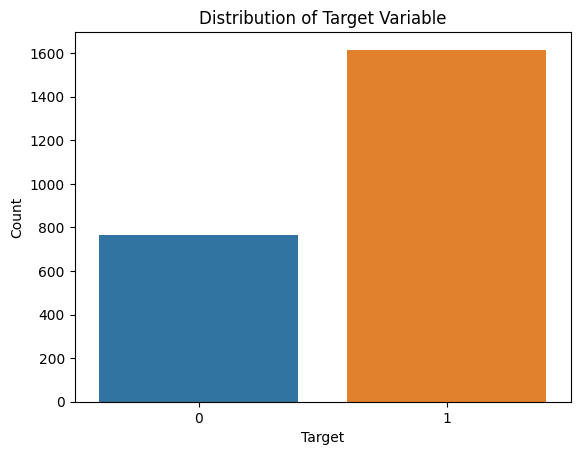

target
1    1616
0     765
Name: count, dtype: int64


In [496]:
###EDA
import matplotlib.pyplot as plt
import seaborn as sns

### target column  tells whether the driver has left the company so lets do EDA around this variable

# Plot the distribution of the target variable
sns.countplot(x='target', data=driver, palette='tab10')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
print(driver['target'].value_counts())

▶ Most of the driver (**1616**) has left the OLA than the present drivers(**765**). Lets try to identify the reason and how can we retain the driver.

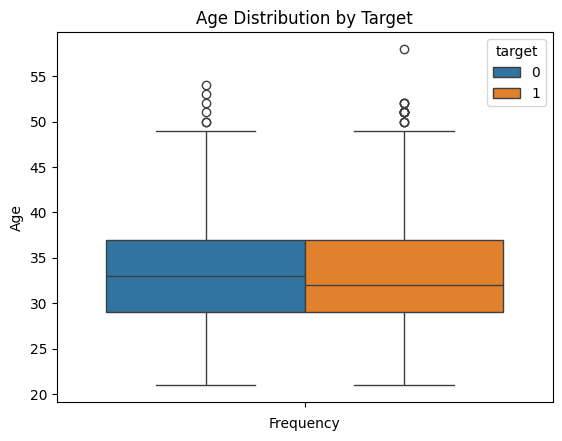

         count       mean       std   min   25%   50%   75%   max
target                                                           
0        765.0  33.486275  5.599306  21.0  29.0  33.0  37.0  54.0
1       1616.0  32.924629  5.937907  21.0  29.0  32.0  37.0  58.0


In [497]:
##Univariate Analysis Based on Target

sns.boxplot(data=driver, y='Age', hue='target')
plt.title('Age Distribution by Target')
plt.ylabel('Age')
plt.xlabel('Frequency')
plt.show()

print(driver.groupby('target')['Age'].describe())

▶ There is no large difference in the age as average age of both cases are **33** and **32**. Most of the drivers age are in range **29-37**.

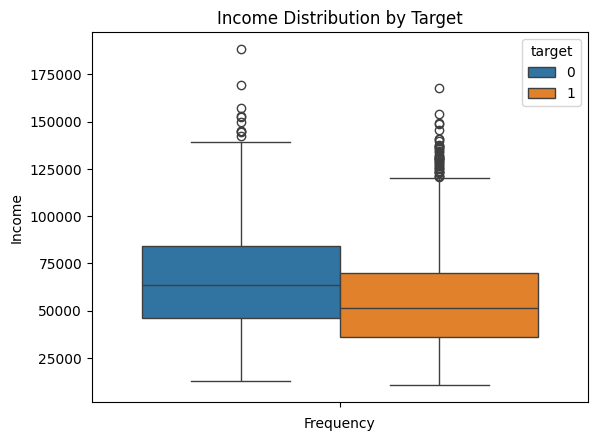

         count          mean           std      min      25%      50%  \
target                                                                  
0        765.0  67303.487582  29391.997351  12938.0  46131.0  63632.0   
1       1616.0  55377.231436  26904.385394  10747.0  36117.5  51630.0   

             75%       max  
target                      
0       83969.00  188418.0  
1       69816.75  167758.0  


In [498]:
sns.boxplot(data=driver, y='Income', hue='target')
plt.title('Income Distribution by Target')
plt.ylabel('Income')
plt.xlabel('Frequency')
plt.show()

print(driver.groupby('target')['Income'].describe())

▶ Those who left has the average income **55377** monthly pretty less than other drivers **67303**. The income of the drivers who has left lies in range **36k-70k** and for other drivers range lies between **46k-83k**.

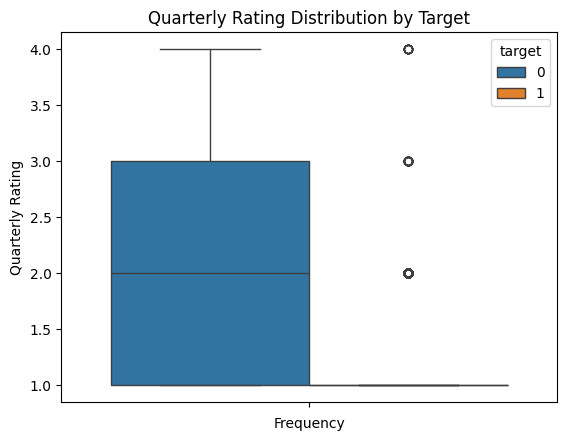

         count      mean       std  min  25%  50%  75%  max
target                                                     
0        765.0  2.028758  1.048164  1.0  1.0  2.0  3.0  4.0
1       1616.0  1.143564  0.441425  1.0  1.0  1.0  1.0  4.0


In [499]:
sns.boxplot(data=driver, y='Quarterly Rating', hue='target')
plt.title('Quarterly Rating Distribution by Target')
plt.ylabel('Quarterly Rating')
plt.xlabel('Frequency')
plt.show()

print(driver.groupby('target')['Quarterly Rating'].describe())


▶ On scale of 1-5 , the poorly rated drivers has left mostly.
The average rating of the drivers who are there are **2** and most of the rating lies between **1-3**.

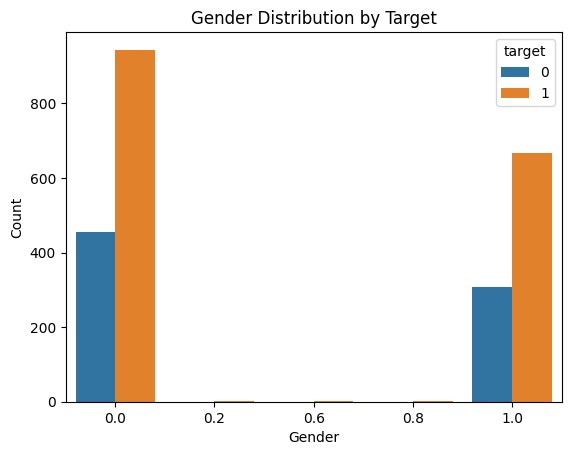

Gender  target
0.0     1         944
        0         456
0.2     1           1
0.6     1           2
0.8     1           2
1.0     1         667
        0         309
Name: count, dtype: int64


In [500]:
##Categorical Variables Analysis Based on Target

sns.countplot(x='Gender', data=driver, hue='target', palette='tab10')
plt.title('Gender Distribution by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print(driver.groupby('Gender')['target'].value_counts())

There are **1400** male drivers out of which **944** has left and there are **976** female drivers out which **667** has left OLA.

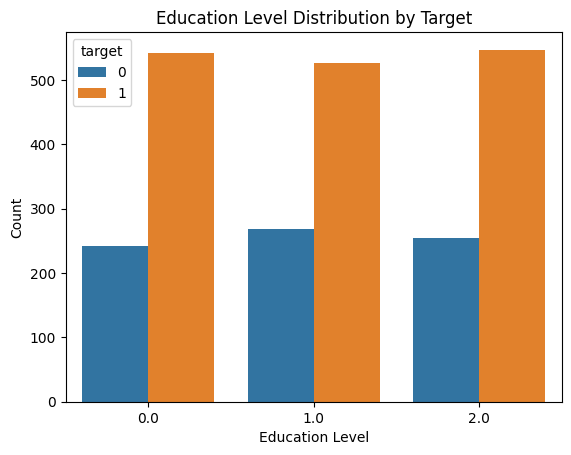

In [501]:
sns.countplot(x='Education_Level', data=driver, hue='target', palette='tab10')
plt.title('Education Level Distribution by Target')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


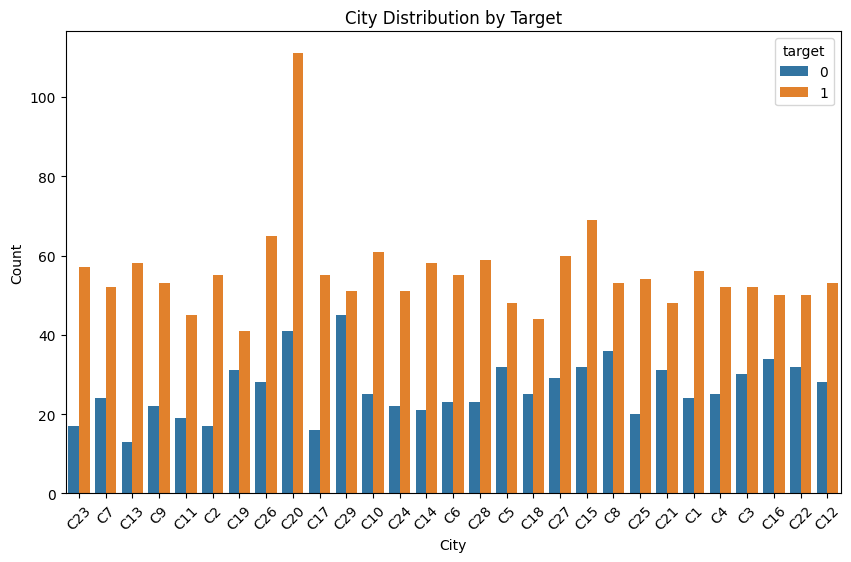

target  City
0       C29      45
        C20      41
        C8       36
        C16      34
        C5       32
        C15      32
        C22      32
        C19      31
        C21      31
        C3       30
        C27      29
        C26      28
        C12      28
        C10      25
        C18      25
        C4       25
        C7       24
        C1       24
        C6       23
        C28      23
        C24      22
        C9       22
        C14      21
        C25      20
        C11      19
        C23      17
        C2       17
        C17      16
        C13      13
1       C20     111
        C15      69
        C26      65
        C10      61
        C27      60
        C28      59
        C14      58
        C13      58
        C23      57
        C1       56
        C6       55
        C2       55
        C17      55
        C25      54
        C8       53
        C12      53
        C9       53
        C3       52
        C4       52
        C7       52
       

In [502]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=driver, hue='target', palette='tab10')
plt.title('City Distribution by Target')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(driver.groupby('target')['City'].value_counts())

The city **C29** has most number of active drivers **45** and drivers in city **C20** has left the most **111**.

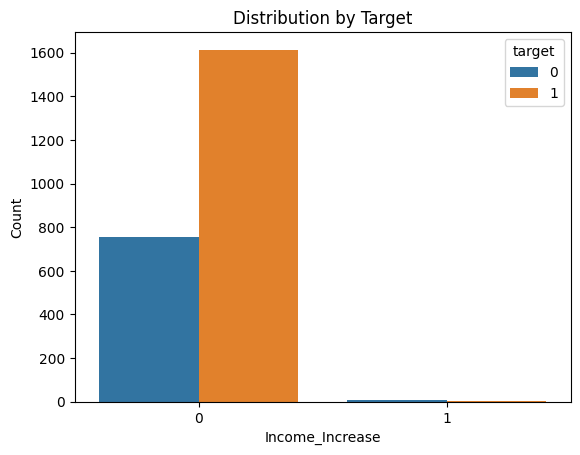

target  Income_Increase
0       0                   756
        1                     9
1       0                  1614
        1                     2
Name: count, dtype: int64


In [503]:
sns.countplot(x='Income_Increase', data=driver, hue='target', palette='tab10')
plt.title('Distribution by Target')
plt.xlabel('Income_Increase')
plt.ylabel('Count')
plt.show()

print(driver.groupby('target')['Income_Increase'].value_counts())

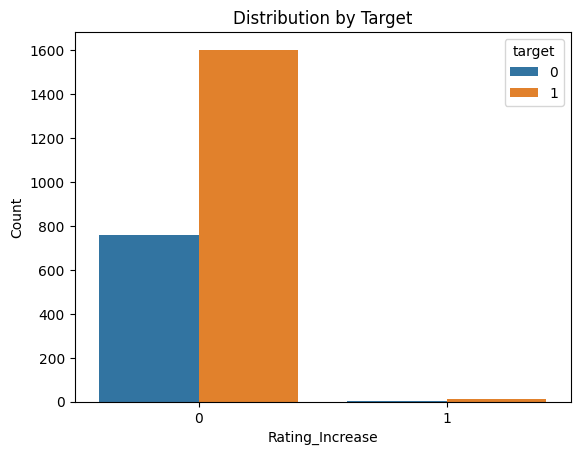

target  Rating_Increase
0       0                   761
        1                     4
1       0                  1604
        1                    12
Name: count, dtype: int64


In [504]:
sns.countplot(x='Rating_Increase', data=driver, hue='target', palette='tab10')
plt.title('Distribution by Target')
plt.xlabel('Rating_Increase')
plt.ylabel('Count')
plt.show()

print(driver.groupby('target')['Rating_Increase'].value_counts())

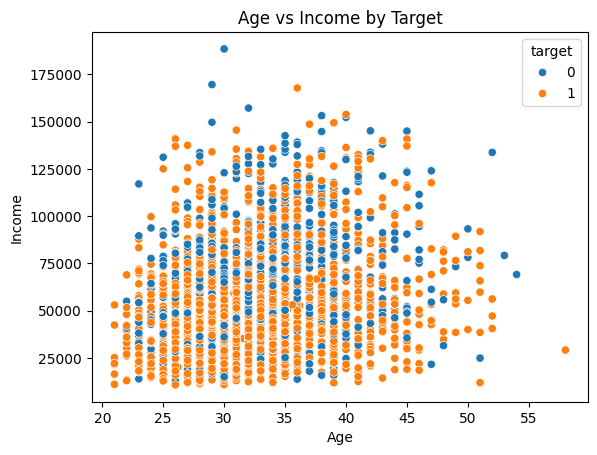

           Age                                                     Income  \
         count       mean       std   min   25%   50%   75%   max   count   
target                                                                      
0        765.0  33.486275  5.599306  21.0  29.0  33.0  37.0  54.0   765.0   
1       1616.0  32.924629  5.937907  21.0  29.0  32.0  37.0  58.0  1616.0   

                                                                         \
                mean           std      min      25%      50%       75%   
target                                                                    
0       67303.487582  29391.997351  12938.0  46131.0  63632.0  83969.00   
1       55377.231436  26904.385394  10747.0  36117.5  51630.0  69816.75   

                  
             max  
target            
0       188418.0  
1       167758.0  


In [505]:
##Bivariate Analysis Based on Target

sns.scatterplot(x='Age', y='Income', data=driver, hue='target', palette='tab10')
plt.title('Age vs Income by Target')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print(driver.groupby('target')[['Age', 'Income']].describe())

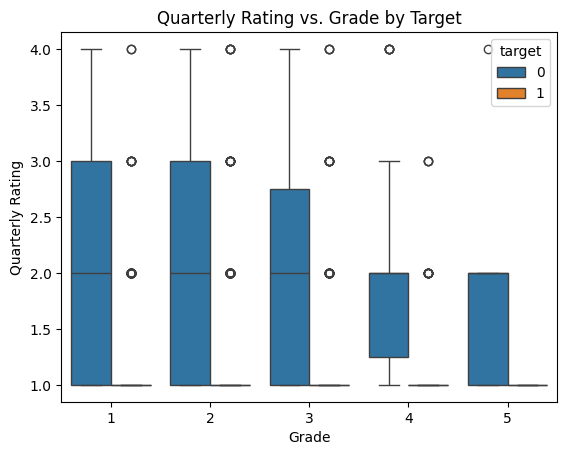

         Grade                                              Quarterly Rating  \
         count      mean       std  min  25%  50%  75%  max            count   
target                                                                         
0        765.0  2.352941  0.931352  1.0  2.0  2.0  3.0  5.0            765.0   
1       1616.0  1.948639  0.902949  1.0  1.0  2.0  3.0  5.0           1616.0   

                                                     
            mean       std  min  25%  50%  75%  max  
target                                               
0       2.028758  1.048164  1.0  1.0  2.0  3.0  4.0  
1       1.143564  0.441425  1.0  1.0  1.0  1.0  4.0  


In [506]:
sns.boxplot(x='Grade', y='Quarterly Rating', hue='target', data=driver)
plt.title('Quarterly Rating vs. Grade by Target')
plt.xlabel('Grade')
plt.ylabel('Quarterly Rating')
plt.show()

print(driver.groupby('target')[['Grade','Quarterly Rating']].describe())


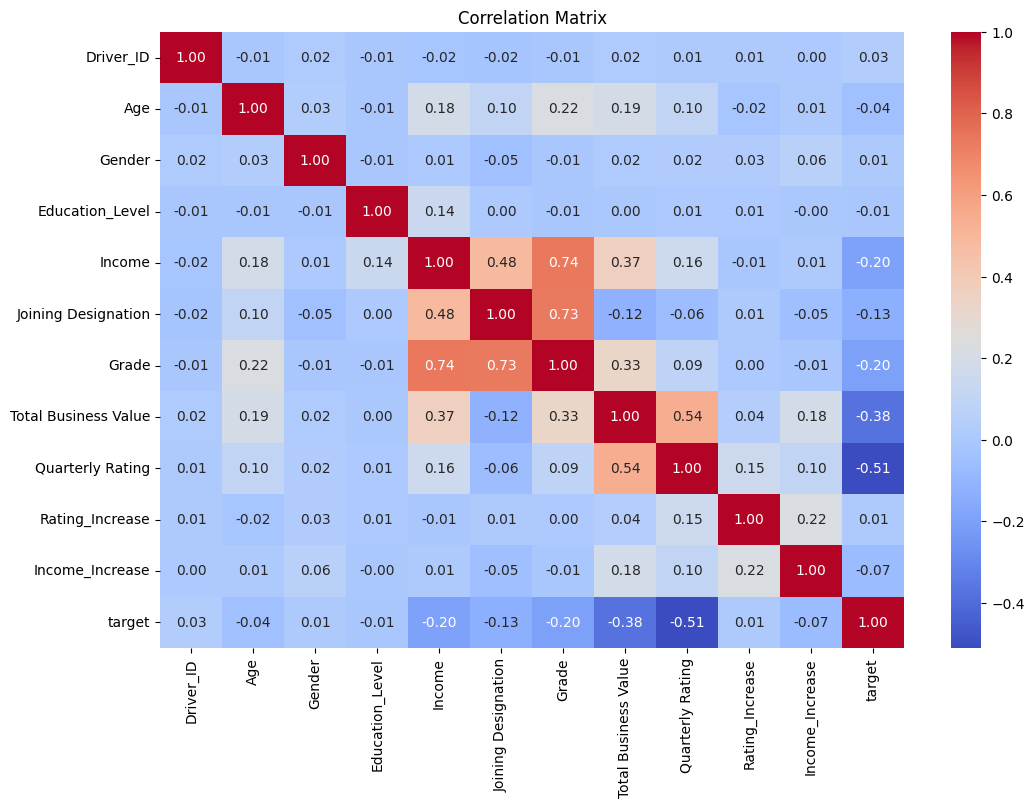

In [507]:
# Calculate correlation matrix considering only numerical columns
corr_matrix = driver.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [508]:
driver.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase,Income_Increase,target
0,2019-01-01,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1,1,1715580.0,2.0,0,0,1
1,2020-11-01,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2,2,0.0,1.0,0,0,0
2,2019-12-01,4,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2,2,350000.0,1.0,0,0,1
3,2019-01-01,5,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1,1,120360.0,1.0,0,0,1
4,2020-08-01,6,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3,3,1265000.0,2.0,0,0,0
5,2020-09-01,8,34.0,0.0,C2,0.0,70656.0,2020-09-19,2020-11-15,3,3,0.0,1.0,0,0,1
6,2020-12-01,11,28.0,1.0,C19,2.0,42172.0,2020-12-07,NaT,1,1,0.0,1.0,0,0,0
7,2019-07-01,12,35.0,0.0,C23,2.0,28116.0,2019-06-29,2019-12-21,1,1,2607180.0,1.0,0,0,1
8,2019-01-01,13,29.0,0.0,C19,2.0,119227.0,2015-05-28,2020-11-25,1,4,10213040.0,1.0,0,0,1
9,2020-10-01,14,39.0,1.0,C26,0.0,19734.0,2020-10-16,NaT,3,3,0.0,1.0,0,0,0


In [509]:
### Filling a null values in lastworkingdate column with last reporting date

driver['LastWorkingDate'].fillna(driver['MMM-YY'], inplace=True)

In [510]:
driver.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,0
Joining Designation,0


In [511]:
from sklearn.model_selection import train_test_split

# Checking distribution of target variable
target_distribution = driver['target'].value_counts(normalize=True)
print(target_distribution)

# Stratified split if there's class imbalance
X = driver.drop(columns=['target'])
y = driver['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Check distribution in train and validation sets
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))


target
1    0.678706
0    0.321294
Name: proportion, dtype: float64
target
1    0.678872
0    0.321128
Name: proportion, dtype: float64
target
1    0.678322
0    0.321678
Name: proportion, dtype: float64


In [512]:
# Exclude date columns
X_train_num = X_train.drop(columns=['MMM-YY', 'Dateofjoining', 'LastWorkingDate'])
X_val_num = X_val.drop(columns=['MMM-YY', 'Dateofjoining', 'LastWorkingDate'])


In [513]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train_num[['City']])
X_val_encoded = encoder.transform(X_val_num[['City']])

# Drop original categorical columns and replace with encoded versions
X_train_num = X_train_num.drop(columns=['City'])
X_val_num = X_val_num.drop(columns=['City'])

# Concatenate encoded columns back to the dataframe
X_train_num = pd.concat([pd.DataFrame(X_train_encoded, index=X_train_num.index), X_train_num], axis=1)
X_val_num = pd.concat([pd.DataFrame(X_val_encoded, index=X_val_num.index), X_val_num], axis=1)


In [514]:
from imblearn.over_sampling import SMOTE

# Convert column names to strings
X_train_num.columns = X_train_num.columns.astype(str)
X_val_num.columns = X_val_num.columns.astype(str)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_num, y_train)

# Check distribution after SMOTE
print(y_train_sm.value_counts(normalize=True))



target
1    0.5
0    0.5
Name: proportion, dtype: float64


In [515]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the RandomForestClassifier with class weights
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Train the model
rf_clf.fit(X_train_sm, y_train_sm)

# Predict on validation set
y_pred = rf_clf.predict(X_val_num)
y_pred_proba = rf_clf.predict_proba(X_val_num)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_val, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       230
           1       0.83      0.90      0.86       485

    accuracy                           0.81       715
   macro avg       0.79      0.75      0.77       715
weighted avg       0.80      0.81      0.80       715

ROC AUC Score:  0.8243478260869566


In [516]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_clf.fit(X_train_sm, y_train_sm)

# Predict on validation set
y_pred_gb = gb_clf.predict(X_val_num)
y_pred_proba_gb = gb_clf.predict_proba(X_val_num)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred_gb))
print("ROC AUC Score: ", roc_auc_score(y_val, y_pred_proba_gb))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.57      0.64       230
           1       0.82      0.90      0.86       485

    accuracy                           0.79       715
   macro avg       0.77      0.74      0.75       715
weighted avg       0.79      0.79      0.79       715

ROC AUC Score:  0.8224921559838637


Top 5 Features by Importance:
                 Feature  Importance
36      Quarterly Rating    0.395823
35  Total Business Value    0.127760
30                Gender    0.078293
31       Education_Level    0.063312
32                Income    0.061510


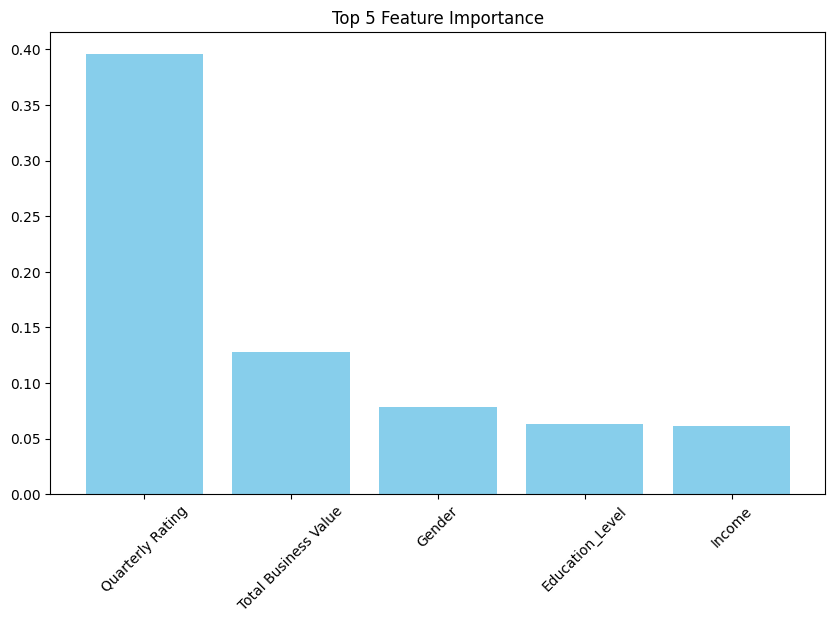

In [517]:
import pandas as pd

importances = gb_clf.feature_importances_

# Convert feature importances into a DataFrame for easy manipulation
feature_importance_df = pd.DataFrame({
    'Feature': X_train_num.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Display the top five features
print("Top 5 Features by Importance:")
print(top_features)

# Plotting the top five features
plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importance")
plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xticks(rotation=45)
plt.show()


# Comparison of Models
**1. Random Forest Classifier**

**Precision:**

 Class 0: 0.75

 Class 1: 0.83

**Recall:**

 Class 0: 0.60

 Class 1: 0.90

**F1-Score:**

 Class 0: 0.67

 Class 1: 0.86

**Accuracy: 0.81**

**ROC AUC Score: 0.8243**

**2. Gradient Boosting Classifier**

**Precision:**

 Class 0: 0.73

 Class 1: 0.82

**Recall:**

 Class 0: 0.57

 Class 1: 0.90

**F1-Score:**

 Class 0: 0.64

 Class 1: 0.86

**Accuracy: 0.79**

**ROC AUC Score: 0.8225**

**Insights and Recommendations**

***Model Performance:***

Both models perform similarly, with the Random Forest classifier having a slightly better overall accuracy **(0.81 vs. 0.79)** and a marginally higher ROC AUC score **(0.8243 vs. 0.8225)**.

The Gradient Boosting classifier also performs well, but the Random Forest classifier slightly edges it out in terms of precision, recall, and F1-score for **Class 0**, which represents drivers who do not leave the company.

***Class Imbalance Impact:***

Both models exhibit better recall for Class 1 (drivers who leave the company), which is essential for retaining drivers as it helps correctly identify those at risk of leaving.

However, the precision for Class 0 is lower, indicating that some drivers who are predicted to stay might actually leave.

***Primary Focus for Ola's Driver Retention:***

**Precision:** Focus on improving precision for Class 1 to reduce false positives. This will help Ola more accurately identify drivers who are likely to leave, reducing unnecessary retention efforts.

**Recall:** The recall for Class 1 is already high, which is crucial as it helps in identifying most of the drivers who might leave, allowing for timely interventions.

**ROC AUC:** The ROC AUC score for both models is high, indicating good overall model performance.


## Observations and Insights

In [518]:
# 1. What percentage of drivers have received a quarterly rating of 5?

rating_5_percentage = (driver[driver['Quarterly Rating'] == 5].shape[0] / driver.shape[0]) * 100

print(f"Percentage of drivers with a quarterly rating of 5: {rating_5_percentage:.2f}%")


Percentage of drivers with a quarterly rating of 5: 0.00%


In [519]:
##correlation between Age and Quarterly Rating

correlation_age_rating = driver['Age'].corr(driver['Quarterly Rating'])

print(f"Correlation between Age and Quarterly Rating: {correlation_age_rating:.2f}")

Correlation between Age and Quarterly Rating: 0.10


In [520]:
## city which showed the most improvement in Quarterly Rating over the past year.

driver['Year'] = driver['MMM-YY'].dt.year

city_improvement = driver.groupby(['City','Year'])['Quarterly Rating'].mean().sort_values(ascending=False)

print("City with the most improvement in Quarterly Rating:")
print(city_improvement.head(1))

City with the most improvement in Quarterly Rating:
City  Year
C24   2019    1.744681
Name: Quarterly Rating, dtype: float64


In [521]:
driver['Grade'].value_counts()

,count
Grade,
2,866
1,751
3,611
4,132
5,21


In [522]:
grade_a_mean = driver[driver['Grade'] == 1]['Total Business Value'].mean()
print(f"Grade A drivers have an average Total Business Value of {grade_a_mean:.2f}.")

overall_mean = driver['Total Business Value'].mean()
print(f"The overall average Total Business Value is {overall_mean:.2f}.")

print(f"Grade A drivers have a {'higher' if grade_a_mean > overall_mean else 'lower'} Total Business Value on average.")


Grade A drivers have an average Total Business Value of 2497950.81.
The overall average Total Business Value is 4586741.82.
Grade A drivers have a lower Total Business Value on average.


In [523]:
df['Rating_Change'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()
df['Business_Value_Change'] = df.groupby('Driver_ID')['Total Business Value'].diff()

impact_analysis = df[df['Rating_Change'] < 0][['Rating_Change', 'Business_Value_Change']].corr().iloc[0, 1]

print(f"Impact of a drop in Quarterly Rating on Total Business Value: {impact_analysis:.2f}")


Impact of a drop in Quarterly Rating on Total Business Value: 0.22


▶ Positive Correlation (0.22): The value of **0.22** suggests that when the Quarterly Rating decreases, there is a slight but positive impact on Total Business Value, though the effect is not strong. This means that a drop in the Quarterly Rating is associated with a slight decrease in the Total Business Value.

In [524]:
##driver's performance be affected by the City they operate in

city_performance = driver.groupby('City')['Total Business Value'].mean().round().sort_values(ascending=False)

print("Driver's Performance by City:")
print(city_performance)


Driver's Performance by City:
City
C29    6905977.0
C13    6381320.0
C26    6184266.0
C12    5989065.0
C22    5522406.0
C16    5339325.0
C5     5205819.0
C19    5074116.0
C27    5051943.0
C14    4986578.0
C28    4925986.0
C24    4917992.0
C6     4789594.0
C10    4678149.0
C8     4530628.0
C1     4498329.0
C21    4371252.0
C18    4337070.0
C4     4174303.0
C15    4168672.0
C25    4005728.0
C11    3938141.0
C7     3882930.0
C2     3627616.0
C3     3557909.0
C9     3244210.0
C20    3107131.0
C23    3082497.0
C17    2659584.0
Name: Total Business Value, dtype: float64


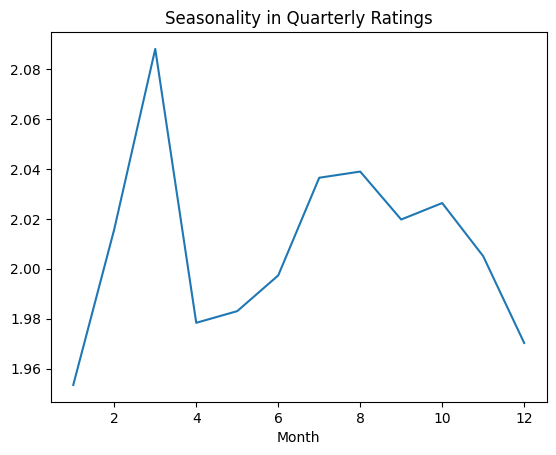

In [525]:
## Seasonality in Quarterly Ratings

df['Month'] = df['MMM-YY'].dt.month
seasonality_analysis = df.groupby('Month')['Quarterly Rating'].mean()
seasonality_analysis.plot()
plt.title('Seasonality in Quarterly Ratings')
plt.show()
